In [2]:
# Hypothesis for two samples
import pandas as pd
import pymc as pm  
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

# Generate some random normal data
group1 = np.random.normal(15,2,1000)  
group2 = np.random.normal(15.7,2,1000)

# Generate Pooled Data
pooled = np.concatenate((group1,group2)) 



In [3]:
# Setup our priors
mu1 = pm.Normal("mu_1",mu=pooled.mean(), tau=1.0/pooled.var()/1000.0)  
mu2 = pm.Normal("mu_2",mu=pooled.mean(), tau=1.0/pooled.var()/1000.0)

sig1 = pm.Uniform("sigma_1",lower=pooled.var()/1000.0,upper=pooled.var()*1000)  
sig2 = pm.Uniform("sigma_2",lower=pooled.var()/1000.0,upper=pooled.var()*1000)


In [4]:
v = pm.Exponential("nu",beta=1.0/29)  

In [5]:
# Include our observed data into the model
t1 = pm.NoncentralT("t_1",mu=mu1, lam=1.0/sig1, nu=v, value=group1[:], observed=True)  
t2 = pm.NoncentralT("t_2",mu=mu2, lam=1.0/sig2, nu=v, value=group2[:], observed=True)


In [6]:
# Push our priors into a model
model = pm.Model( [t1, mu1, sig1, t2, mu2, sig2, v] )


In [7]:
# Generate our MCMC object
mcmc = pm.MCMC(model)


# Run MCMC sampler
mcmc.sample(40000,10000,2) 


 [-----------------100%-----------------] 40000 of 40000 complete in 42.0 sec

Plotting nu
Plotting sigma_1
Plotting sigma_2
Plotting mu_1
Plotting mu_2


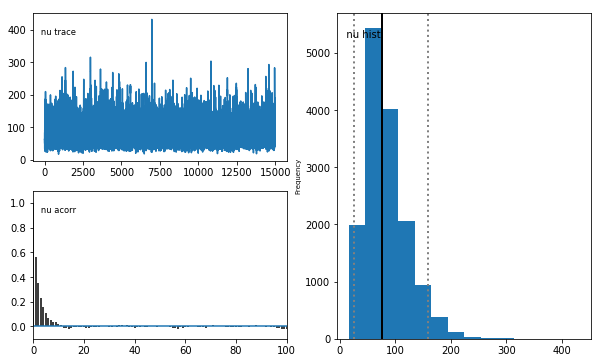

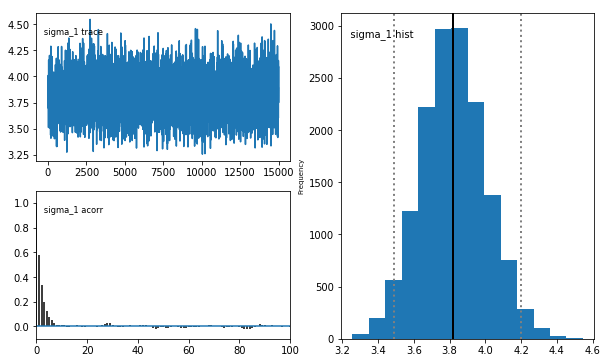

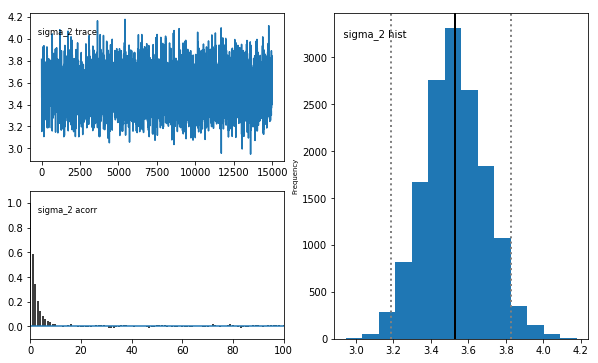

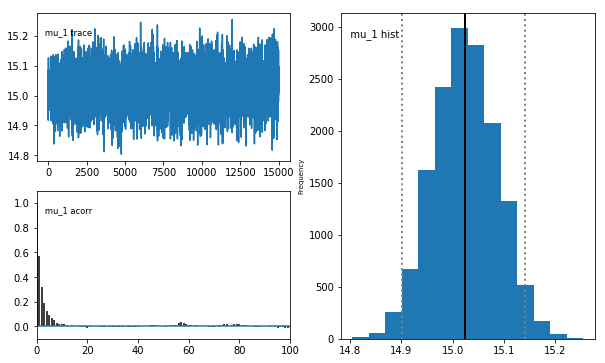

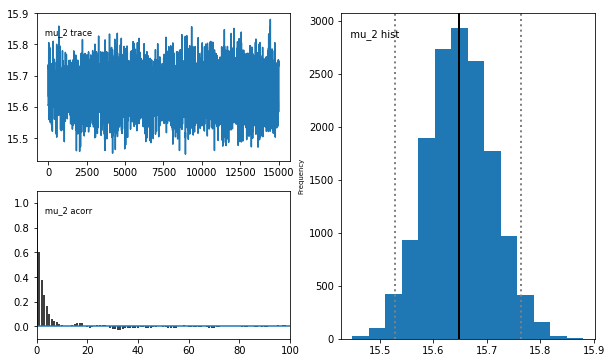

In [8]:
from pymc.Matplot import plot as mcplot  
mcplot(mcmc) 


In [9]:
mus1 = mcmc.trace('mu_1')[:]  
mus2 = mcmc.trace('mu_2')[:]  
sigmas1 = mcmc.trace('sigma_1')[:]  
sigmas2 = mcmc.trace('sigma_2')[:]  
nus = mcmc.trace('nu')[:] 


In [10]:
diff_mus = mus1-mus2  
diff_sigmas = sigmas1-sigmas2  
normality = np.log(nus)  
effect_size = (mus1-mus2)/np.sqrt((sigmas1**2+sigmas2**2)/2.)


In [11]:
# Estimates of μ1 and μ2
print ("mu_1", mus1.mean())  
print ("mu_2", mus2.mean())

mu_1 15.024425631012205
mu_2 15.649024717141886


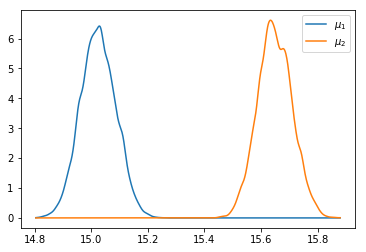

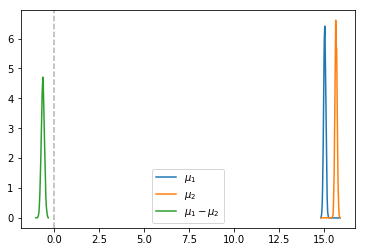

In [12]:
from scipy.stats import gaussian_kde  


# prepare plotting area to fit both graphs
minx = min(min(mus1),min(mus2))  
maxx = max(max(mus1),max(mus2))  
# x values to plot on
xs = np.linspace(minx,maxx,1000)

# generate density estimates
gkde1 = gaussian_kde(mus1)  
gkde2 = gaussian_kde(mus2)

# draw plots
plt.plot(xs,gkde1(xs),label='$\mu_1$')  
plt.plot(xs,gkde2(xs),label='$\mu_2$')  
plt.legend()  
plt.show()  



# Bayesian Hypothesis Testing and p-Values

p = (diff_mus > 0).mean() 




# visualize this probability 


minx = min(min(mus1),min(mus2))  
maxx = max(max(mus1),max(mus2))  
xs = np.linspace(minx,maxx,1000)

gkde1 = gaussian_kde(mus1)  
gkde2 = gaussian_kde(mus2)

plt.plot(xs,gkde1(xs),label='$\mu_1$')  
plt.plot(xs,gkde2(xs),label='$\mu_2$')  
plt.legend()



minx = min(diff_mus)  
maxx = max(diff_mus)  
xs = np.linspace(minx,maxx,1000)  
gkde = gaussian_kde(diff_mus)

plt.plot(xs,gkde(xs),label='$\mu_1-\mu_2$')  
plt.legend()

plt.axvline(0, color='#000000',alpha=0.3,linestyle='--')

plt.show()
